In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import statsmodels.api as sm

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Conv2D, BatchNormalization,MaxPooling2D, GlobalAveragePooling2D, Resizing, Rescaling
from tensorflow.keras import optimizers
from tensorflow.keras import Model
from keras.models import load_model
import tensorflow.keras.utils


In [2]:
grp = pd.read_csv('../Data/Group_by.csv',low_memory=False)

In [3]:
grp

,Unnamed: 0,Location,Province,Railway,Protection,Trains Daily,Count,Train Max Speed (mph),Road Max Speed (km/h),Vehicles Daily,Protection_en,Province_en,Railway_en
0,0,10997,SK,LCR,Passive,0.01,0.0,10.0,50.0,2.0,3,9,43
1,1,11138,SK,CN,Passive,4.06,0.0,30.0,50.0,50.0,3,9,18
2,2,11167,SK,STRCO,Passive,2.00,0.0,10.0,80.0,2.0,3,9,65
3,3,11176,SK,GWR,Passive,1.00,0.0,35.0,50.0,10.0,3,9,33
4,4,11178,SK,GWR,Passive,1.00,0.0,35.0,50.0,25.0,3,9,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15369,16565,private access to maintenance bldg,BC,CN,Passive,3.00,0.0,20.0,10.0,25.0,3,1,18
15370,16570,unknown,BC,BNSFRC,Passive,1.00,0.0,10.0,0.0,1.0,3,1,8
15371,16571,unknown,BC,CN,Passive,6.43,0.0,40.0,25.0,10.0,3,1,18
15372,16572,unnamed farm road,BC,CN,Passive,39.86,0.0,60.0,15.0,5.0,3,1,18


In [4]:
y = grp['Count'].astype('float32')
X = grp[[
                            
                            'Trains Daily',
                            'Vehicles Daily',
                            'Train Max Speed (mph)',
                            'Road Max Speed (km/h)',
                            # 'ApproxTrainSpeed_MPH',
                            # 'NumCars',
                            # 'TrainLength_Feet'
                            ]]



# poisson_training_results = sm.GLM(y1, X, family=sm.families.NegativeBinomial()).fit()
# print(poisson_training_results.summary())

# X = pd.DataFrame(MinMaxScaler().fit_transform(X),columns = X.columns)

X.shape

(15374, 4)

In [5]:


s = pd.get_dummies(grp['Province'])
# s1 = pd.get_dummies(grp['Railway'])
s2 = pd.get_dummies(grp['Protection'])
# s3 = pd.get_dummies(grp['Location'])
# # s4 = pd.get_dummies(grp['SubdOwnerID_DisplayEng'])

X = pd.concat([X,s],axis=1)
# X = pd.concat([X,s1],axis=1)
X = pd.concat([X,s2],axis=1)
# X = pd.concat([X,s3],axis=1)
# X = pd.concat([X,s4],axis=1)
X = sm.add_constant(X)
# est= sm.Poisson(y1,X,).fit(cov_type='HC2')
# y_pred = est.predict(X)
# est.summary()


# clf = PoissonRegressor().fit(X,y)
poisson_training_results = sm.GLM(y, X, family=sm.families.Poisson()).fit(cov_type='HC2')
print(poisson_training_results.summary())
y_pred = poisson_training_results.predict(X)

# for i in range(1,7):
#     sm.graphics.plot_fit(poisson_training_results, i, vlines=False)
#     plt.show()


# sm.graphics.plot_fit(poisson_training_results, 1, vlines=False)
# sm.graphics.plot_fit(poisson_training_results, 2, vlines=False)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Count   No. Observations:                15374
Model:                            GLM   Df Residuals:                    15356
Model Family:                 Poisson   Df Model:                           17
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8409.4
Date:                Sun, 09 Apr 2023   Deviance:                       12059.
Time:                        15:05:52   Pearson chi2:                 2.63e+04
No. Iterations:                    21   Pseudo R-squ. (CS):             0.1247
Covariance Type:                  HC2                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -4.30

In [6]:
regression_results(y,y_pred)

NameError: name 'regression_results' is not defined

In [7]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import PoissonRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn import metrics
grp = pd.read_csv('../Data/Group_by.csv',low_memory=False)



all_features = [
    'Trains Daily',
    'Vehicles Daily',
    'Train Max Speed (mph)',
    'Road Max Speed (km/h)',
    'Province', 
    'Protection'
]


# Cat features of interest
categorical_features = [
    'Province', 
    'Protection'
    ]
# OneHotEncoder to get dummy variables for the cat variables
categorical_transformer = Pipeline([
        ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
    ]
)

#############
# Numerical features of intersest
numeric_features = [
    'Trains Daily',
    'Vehicles Daily',
    'Train Max Speed (mph)',
    'Road Max Speed (km/h)',
    ]
# Apply a scaler
numeric_transformer = Pipeline(
    [
        ('scaler', StandardScaler())
    ]
)

preprocessor = ColumnTransformer(
    # do the processing on these features of interest and drop the remainders
    [
        ('categoricals', categorical_transformer, categorical_features),
        ('numericals', numeric_transformer, numeric_features)
    ],
    remainder = 'drop'
)

# Creating the pipeline 
pipeline = Pipeline(
    [
        ('preprocessing', preprocessor),
        ('clf', PoissonRegressor())
    ]
)


X = grp[all_features]
y = grp['Count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)



# pipeline.fit(X_train, y_train)
pipeline.fit(X, y)

# y_pred = pipeline.predict(X_test)
y_pred = pipeline.predict(X)

# regression_results(y_test,y_pred)
regression_results(y,y_pred)
print(f'The model score is {pipeline.score(X,y)}')

NameError: name 'regression_results' is not defined

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import HistGradientBoostingRegressor

grp = pd.read_csv('../Data/Group_by.csv',low_memory=False)



all_features = [
    'Trains Daily',
    'Vehicles Daily',
    'Train Max Speed (mph)',
    'Road Max Speed (km/h)',
    'Province', 
    'Protection'
]


# Cat features of interest
categorical_features = [
    'Province', 
    'Protection'
    ]
# OneHotEncoder to get dummy variables for the cat variables
categorical_transformer = Pipeline([
        ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
    ]
)

#############
# Numerical features of intersest
numeric_features = [
    'Trains Daily',
    'Vehicles Daily',
    'Train Max Speed (mph)',
    'Road Max Speed (km/h)',
    ]
# Apply a scaler
numeric_transformer = Pipeline(
    [
        ('scaler', StandardScaler())
    ]
)

preprocessor = ColumnTransformer(
    # do the processing on these features of interest and drop the remainders
    [
        ('categoricals', categorical_transformer, categorical_features),
        ('numericals', numeric_transformer, numeric_features)
    ],
    remainder = 'drop'
)

# Creating the pipeline 
pipeline = Pipeline(
    [
        ('preprocessing', preprocessor),
        ('clf', RandomForestRegressor(criterion='poisson'))
    ]
)


X = grp[all_features]
y = grp['Count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)


# pipeline.fit(X_train, y_train)
pipeline.fit(X, y)

# y_pred = pipeline.predict(X_test)
y_pred = pipeline.predict(X)

# regression_results(y_test,y_pred)
regression_results(y,y_pred)

print(f'The model score is {pipeline.score(X,y)}')

NameError: name 'regression_results' is not defined

In [ ]:
grp = pd.read_csv('../Data/Group_by.csv',low_memory=False)



all_features = [
    'Trains Daily',
    'Vehicles Daily',
    'Train Max Speed (mph)',
    'Road Max Speed (km/h)',
    'Province', 
    'Protection'
]


# Cat features of interest
categorical_features = [
    'Province', 
    'Protection'
    ]
# OneHotEncoder to get dummy variables for the cat variables
categorical_transformer = Pipeline([
        ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
    ]
)

#############
# Numerical features of intersest
numeric_features = [
    'Trains Daily',
    'Vehicles Daily',
    'Train Max Speed (mph)',
    'Road Max Speed (km/h)',
    ]
# Apply a scaler
numeric_transformer = Pipeline(
    [
        ('scaler', StandardScaler())
    ]
)

preprocessor = ColumnTransformer(
    # do the processing on these features of interest and drop the remainders
    [
        ('categoricals', categorical_transformer, categorical_features),
        ('numericals', numeric_transformer, numeric_features)
    ],
    remainder = 'drop'
)

# Creating the pipeline 
pipeline = Pipeline(
    [
        ('preprocessing', preprocessor),
        ('clf', HistGradientBoostingRegressor(loss='poisson'))
    ]
)


X = grp[all_features]
y = grp['Count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)



pipeline.fit(X_train, y_train)
# pipeline.fit(X, y)

y_pred = pipeline.predict(X_test)
# y_pred = pipeline.predict(X)

regression_results(y_test,y_pred)
# regression_results(y,y_pred)

print(f'The model score is {pipeline.score(X,y)}')

explained_variance:  0.1081
mean_squared_log_error:  0.0916
r2:  0.1079
MAE:  0.2958
MSE:  0.3789
RMSE:  0.6155
The model score is 0.255001636517889


In [ ]:
stoppppp

NameError: name 'stoppppp' is not defined

In [2]:
grp = pd.read_csv('../Data/Group_by.csv',low_memory=False)
y = grp['Count'].astype('float32')
X = grp[[
                            
                            'Trains Daily',
                            'Vehicles Daily',
                            'Train Max Speed (mph)',
                            'Road Max Speed (km/h)',
                            # 'ApproxTrainSpeed_MPH',
                            # 'NumCars',
                            # 'TrainLength_Feet'
                            ]]

In [3]:
y.value_counts()

0.0     13279
1.0      1402
2.0       436
3.0       154
4.0        54
5.0        24
6.0        14
7.0         3
8.0         3
10.0        2
14.0        1
9.0         1
17.0        1
Name: Count, dtype: int64

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# y_train = keras.utils.to_categorical(y_train)
# y_test = keras.utils.to_categorical(y_test)




input_shape = len(X.columns)

In [5]:
model = keras.Sequential(
    [
        # Input layer
        keras.Input(shape=input_shape),
        # Hidden layers\
        layers.Dense(100, activation="relu"),
        layers.Dense(50, activation="relu"),
        layers.Dense(20, activation="relu"),
        layers.Dense(10, activation="relu"),
        # output
        layers.Dense(2, activation="softmax"),
        # layers.Dense(1)
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               500       
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 20)                1020      
                                                                 
 dense_3 (Dense)             (None, 10)                210       
                                                                 
 dense_4 (Dense)             (None, 2)                 22        
                                                                 
Total params: 6,802
Trainable params: 6,802
Non-trainable params: 0
_________________________________________________________________


In [6]:


batch_size = 128
epochs = 300
model.compile(loss="Poisson", optimizer="adam", metrics=['mse'])

hist = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/300


C:\Users\Cian-work\AppData\Roaming\Python\Python39\site-packages\keras\engine\data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


98/98 [==============================] - 1s 2ms/step - loss: 1.3238 - mse: 0.6731 - val_loss: 0.6332 - val_mse: 0.4398
Epoch 2/300
98/98 [==============================] - 0s 1ms/step - loss: 0.6509 - mse: 0.5554 - val_loss: 0.6328 - val_mse: 0.4382
Epoch 3/300
98/98 [==============================] - 0s 1ms/step - loss: 0.6508 - mse: 0.5549 - val_loss: 0.6327 - val_mse: 0.4380
Epoch 4/300
98/98 [==============================] - 0s 1ms/step - loss: 0.6508 - mse: 0.5548 - val_loss: 0.6327 - val_mse: 0.4379
Epoch 5/300
98/98 [==============================] - 0s 1ms/step - loss: 0.6508 - mse: 0.5547 - val_loss: 0.6327 - val_mse: 0.4379
Epoch 6/300
98/98 [==============================] - 0s 1ms/step - loss: 0.6508 - mse: 0.5547 - val_loss: 0.6327 - val_mse: 0.4379
Epoch 7/300
98/98 [==============================] - 0s 1ms/step - loss: 0.6508 - mse: 0.5547 - val_loss: 0.6327 - val_mse: 0.4379
Epoch 8/300
98/98 [==============================] - 0s 1ms/step - loss: 0.6508 - mse: 0.5547 -

In [ ]:
hist.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

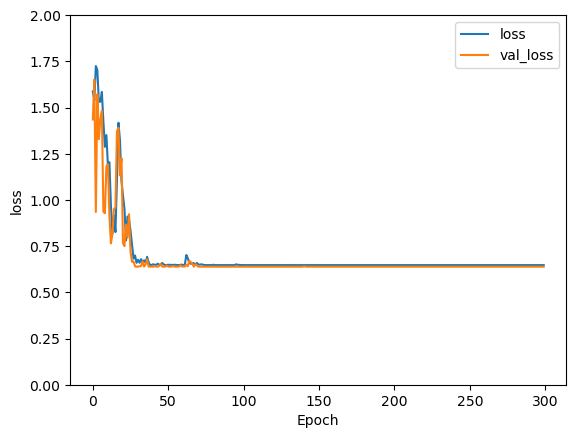

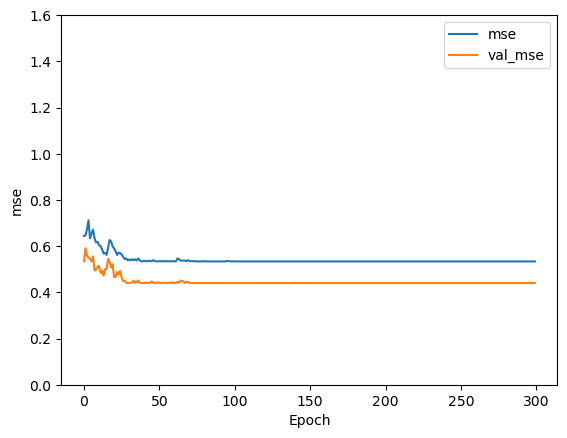

In [ ]:
def plotter(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric])
  plt.xlabel('Epoch')
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

  

plotter(hist, 'loss')
plt.ylim(0,2)
plt.show()
plotter(hist, 'mse')
plt.ylim(0,1.6)
plt.show()
# plotter(hist, 'mae')

# plt.show()

